In [8]:
from controlnet_aux.midas import MidasDetector 
import torch 

In [9]:
import numpy as np
from PIL import Image

In [10]:
sub = 1
image_path = 'processed_data/subj{:02d}/nsd_train_stim_sub{}.npy'.format(sub,sub) 
data = np.load(image_path)

FileNotFoundError: [Errno 2] No such file or directory: 'processed_data/subj01/nsd_train_stim_sub1.npy'

[[[167. 170. 179.]
  [168. 171. 180.]
  [169. 172. 179.]
  ...
  [172. 175. 182.]
  [172. 175. 182.]
  [172. 175. 180.]]

 [[166. 169. 178.]
  [165. 168. 177.]
  [166. 169. 179.]
  ...
  [172. 175. 182.]
  [172. 175. 182.]
  [172. 175. 182.]]

 [[166. 169. 178.]
  [166. 169. 178.]
  [165. 168. 177.]
  ...
  [172. 175. 182.]
  [173. 176. 183.]
  [173. 176. 183.]]

 ...

 [[ 53.  35.  25.]
  [ 72.  54.  40.]
  [ 76.  59.  43.]
  ...
  [128. 103.  86.]
  [123. 102.  83.]
  [125.  99.  84.]]

 [[ 64.  47.  37.]
  [ 68.  50.  36.]
  [ 49.  31.  17.]
  ...
  [135. 109.  92.]
  [125. 106.  86.]
  [128. 102.  87.]]

 [[ 59.  42.  32.]
  [ 77.  59.  45.]
  [ 59.  41.  27.]
  ...
  [135. 109.  92.]
  [132. 114.  94.]
  [137. 111.  96.]]]
(425, 425, 3)
float64
(425, 425)


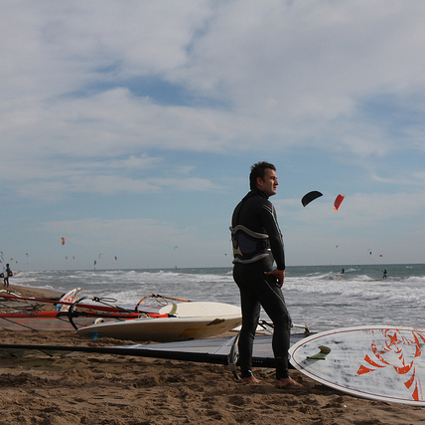

In [5]:
print(data[0])
print(data[0].shape)
print(data[0].dtype)
img = Image.fromarray(data[0].astype(np.uint8))
print(img.size)
img

In [3]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


In [7]:
print(torch.cuda.device_count())
print(torch.cuda.current_device())
print(torch.cuda.get_device_name(torch.cuda.current_device()))

1
0
NVIDIA GeForce RTX 4070 Laptop GPU


In [7]:
midas_depth = MidasDetector.from_pretrained(
  "valhalla/t2iadapter-aux-models", filename="dpt_large_384.pt", model_type="dpt_large"
).to("cuda")

(512, 512)


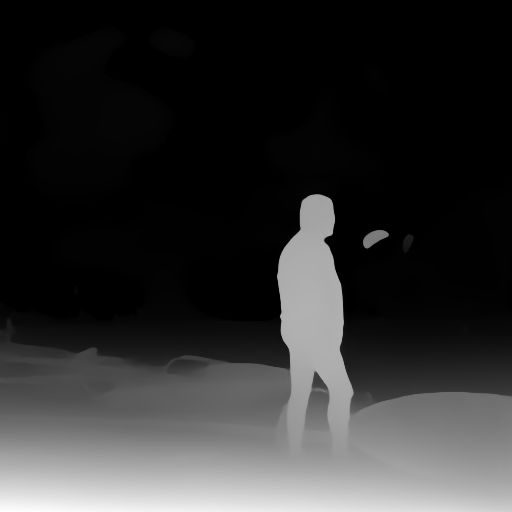

In [8]:
# making input and output resolution the same as original stimulus images size (425 x 425) results in 448 x 448 image  
# getting 512 x 512 depth images immediately during this step since stimulus images will get resized to 512 x 512 anyway 
depth_img = midas_depth(
  img, detect_resolution=512, image_resolution=512
)

print(depth_img.size)
depth_img

In [9]:
depth_img_arr = midas_depth(
  data[0].astype(np.uint8), detect_resolution=425, image_resolution=64
)

type(depth_img_arr)
print(depth_img_arr.dtype)
print(depth_img_arr.shape)

uint8
(512, 512, 3)


In [10]:
depth_stim_array = np.zeros((1,512,512,3))
depth_stim_array[0] = depth_img_arr.astype(np.float64)
print(depth_stim_array[0].shape, depth_stim_array[0].dtype)

(512, 512, 3) float64
